# DSA Telkomsel - Homework Python for Data Analytics
## Rizaldy Al Kautsar Utomo - 95078

## Mohon jangan dinilai dulu sebelum Minggu 10 November 2019, pada 3-8 November saya full dinas ke luar kota yang sulit akses google sehingga baru sempat mengerjakan full di Jakarta pada 9 November 2019

## A. Import Library dan Data

<br> Library yang digunakan pada exercise ini adalah pandas, numpy matplotlib dan seaborn
<br> Sumber dataset yang digunakan https://www.kaggle.com/c/titanic

In [24]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# read csv
df = pd.read_csv('csv/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## B. Eksplorasi Data

In [26]:
df.shape

(891, 12)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<br> Dataset memiliki 891 baris dan 12 kolom

In [28]:
#cek jumlah null dari tiap kolom

(1-(df.isnull().sum()/891))*100

PassengerId    100.000000
Survived       100.000000
Pclass         100.000000
Name           100.000000
Sex            100.000000
Age             80.134680
SibSp          100.000000
Parch          100.000000
Ticket         100.000000
Fare           100.000000
Cabin           22.895623
Embarked        99.775533
dtype: float64

<br> Terdapat 3 kolom yang incomplete, Age hanya 80.1% complete, Fare hanya 22.9% dan Embarked 99.8%

### Filling the Missing Value

In [29]:
# cari mode dari kolom embarked untuk mengisi missing value
df.loc[:,"Embarked"].mode()

0    S
dtype: object

In [30]:
df.Embarked.fillna("C", inplace=True)

In [31]:
#cari median dari kolom age untuk mengisi missing value

df.loc[:,"Age"].median()

28.0

In [32]:
df.Age.fillna(28, inplace=True)

In [33]:
#fillna kolom kabin dengan N karena jumlah null value terlalu banyak

df.Cabin.fillna('N',inplace=True)

In [35]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Note dari describe column

<br> Survival Rate: 38.3%
<br> Rata-rata umur: 29.3 tahun
<br> Rata2 Tarif: $32
<br> Rata2 Class: 2.3

In [37]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## C. Visualisasi Data

### C.1 Mencari info dasar mengenai survival rate

In [40]:
df['Survived_Value']=df['Survived'].map({True: 'yes', False: 'no'})

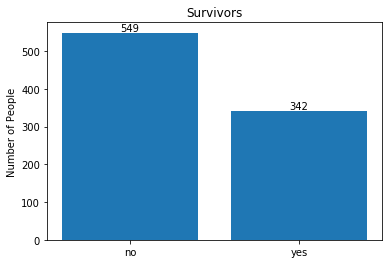

In [42]:
# create a figure and axis
fig, ax = plt.subplots()
survived_class = df['Survived_Value'].value_counts()\
.reset_index(name='count_survived')

# scatter the sepal_length against the sepal_width
gambar1=ax.bar(survived_class['index'], survived_class['count_survived'])
# set a title and labels
ax.set_title('''Survivors''')
ax.set_xlabel('')
ax.set_ylabel('Number of People')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(gambar1)
plt.savefig('NoOfSurvivors.png');

<br> **Jumlah Survivors adalah 342, dan Korban adalah 549**

### C.2 Mencari feature paling berkorelasi untuk menentukan visualisasi dan insight yang paling penting

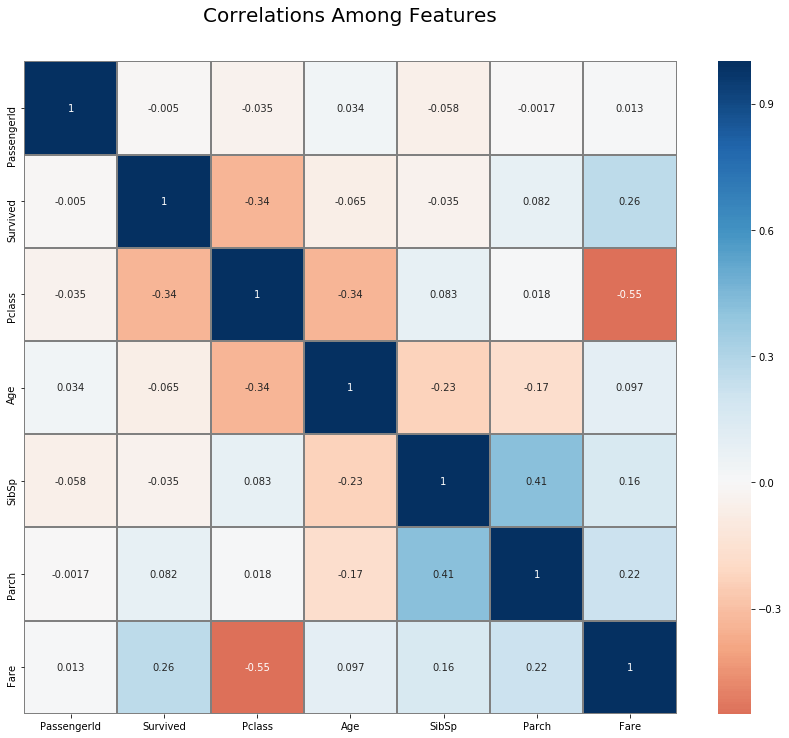

In [45]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
plt.subplots(figsize = (15,12))
sns.heatmap(df.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu', 
            linewidths=.9, 
            linecolor='gray',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

In [44]:
print(abs(df.corr()['Survived']).sort_values(ascending=False))

Survived       1.000000
Pclass         0.338481
Fare           0.257307
Parch          0.081629
Age            0.064910
SibSp          0.035322
PassengerId    0.005007
Name: Survived, dtype: float64


<br> Feature paling berkorelasi dengan tingkat survival:
    - Passenger Class (33.8%)
    - Fare (25.7%)
PClass dan Fare juga berkorelasi kuat dengan korelasi sebesar 55%, hipotesa yang masuk akal semakin tinggi kelas, fare semakin tinggi
    
<br> Fitur terkait demografi sepert Relationtship Parent, Sibling serta Age tidak memiliki korelasi yang cukup kuat dengan survival rate
    - Parch (8.2%)
    - SibSp (3.5%)
    - Age (7.7%)
<br> Feature yang bukan numeric:
    - Sex
    - Embarked

## C.3 Mengelompokan Passenger Class dan Survival Rate

Text(0.5, 1.0, '% of survivors by class')

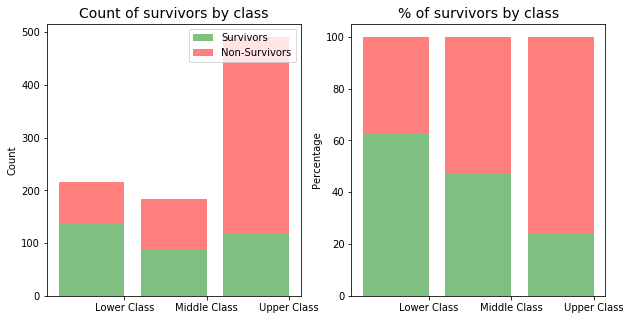

In [52]:
survivors_data = df[df.Survived==True]
non_survivors_data = df[df.Survived==False]


def as_percent(val, precision='0.2'):
    """Convert number to percentage string."""
    if isinstance(val, Number):
        return "{{:{}%}}".format(precision).format(val)
    else:
        raise TypeError("Numeric type required")

def calculate_percentage(val, total, format_percent = False):
    """Calculates the percentage of a value over a total"""
    percent = np.divide(val, total, dtype=float)
    if format_percent:
        percent = as_percent(percent)
    return percent

# calculate values for each survival status
survivors_class = survivors_data.groupby(['Pclass']).size().values
non_survivors_class = non_survivors_data.groupby(['Pclass']).size().values

# calculate totals for percentates
totals = survivors_class + non_survivors_class

# use calculate_percentage_function to calculate percentage of the total
data1_percentages = calculate_percentage(survivors_class, totals)*100 
data2_percentages = calculate_percentage(non_survivors_class, totals)*100 


class_categories = ['Lower Class', 'Middle Class', 'Upper Class']


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# plot chart for count of survivors by class
ax1.bar(range(len(survivors_class)), survivors_class, label='Survivors', alpha=0.5, color='g')
ax1.bar(range(len(non_survivors_class)), non_survivors_class, bottom=survivors_class, label='Non-Survivors', alpha=0.5, color='r')
plt.sca(ax1)
plt.xticks([0.4, 1.4, 2.4], class_categories )
ax1.set_ylabel("Count")
ax1.set_xlabel("")
ax1.set_title("Count of survivors by class",fontsize=14)
plt.legend(loc='upper right')

# plot chart for percentage of survivors by class
ax2.bar(range(len(data1_percentages)), data1_percentages, alpha=0.5, color='g')
ax2.bar(range(len(data2_percentages)), data2_percentages, bottom=data1_percentages, alpha=0.5, color='r')
plt.sca(ax2)
plt.xticks([0.4, 1.4, 2.4],  class_categories)
ax2.set_ylabel("Percentage")
ax2.set_xlabel("")
ax2.set_title("% of survivors by class",fontsize=14)

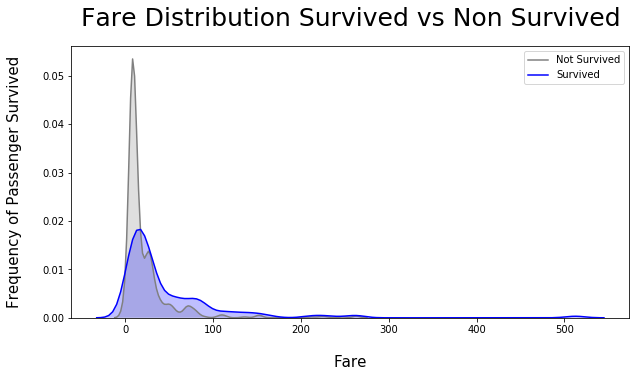

In [53]:
fig = plt.figure(figsize=(10,5),)
ax=sns.kdeplot(df.loc[(df['Survived'] == 0),'Fare'] , color='gray',shade=True,label='Not Survived')
ax=sns.kdeplot(df.loc[(df['Survived'] == 1),'Fare'] , color='blue',shade=True, label='Survived')
plt.title('Fare Distribution Survived vs Non Survived', fontsize = 25, pad = 20)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Fare", fontsize = 15, labelpad = 20);

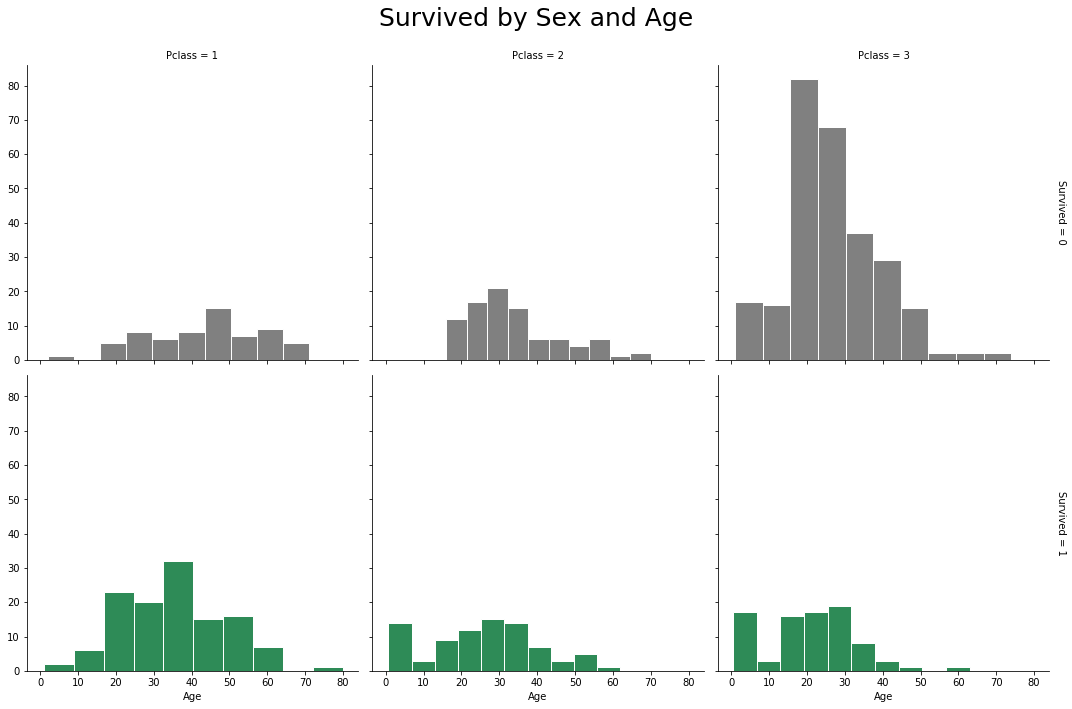

In [62]:
pal = {1:"seagreen", 0:"gray"}
g = sns.FacetGrid(df,size=5, col="Pclass", row="Survived", margin_titles=True, hue = "Survived",
                  palette=pal)
g = g.map(plt.hist, "Age", edgecolor = 'white');
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

/Users/rzrizaldy/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/rzrizaldy/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


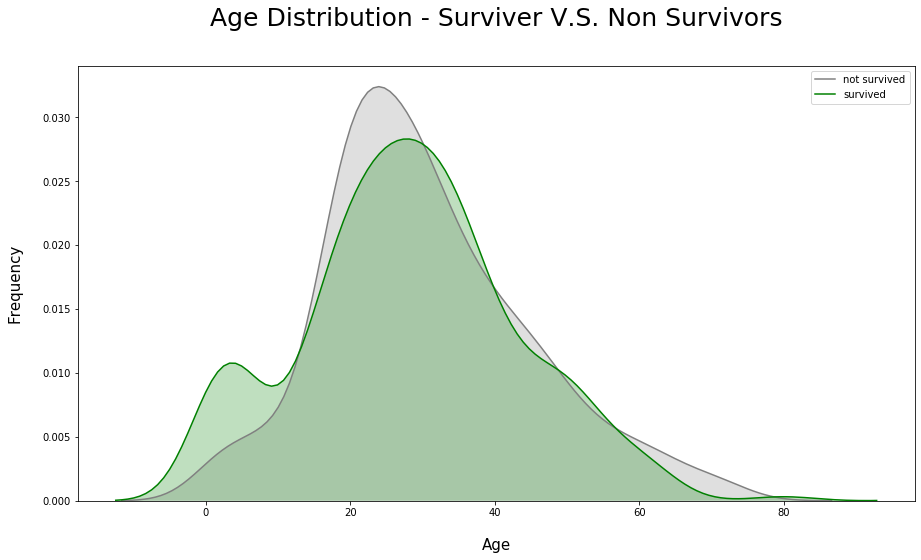

In [63]:
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(df.loc[(df['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(df.loc[(df['Survived'] == 1),'Age'] , color='g',shade=True, label='survived')
plt.title('Age Distribution - Surviver V.S. Non Survivors', fontsize = 25, pad = 40)
plt.xlabel("Age", fontsize = 15, labelpad = 20)
plt.ylabel('Frequency', fontsize = 15, labelpad= 20);